In [75]:
#importnado bibliotecas que foram usadas (algumas não foram no final)
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_lm

import scipy.stats as stats

In [76]:
#adicionando a base de dados utilizados no programa para fazer a regressão
dados_df = pd.read_excel("database2005.xlsx")
df = pd.read_excel("database2005.xlsx")
dados_df = dados_df.drop(['Municipios'],axis=1) #deletando a coluna com os municipios para ter apenas dados numéricos

In [77]:
#Rodando as estatisticas descritivas de todos os dados
dados_df.describe()

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,2.263801,1.641116,3.615173,9.141380,-1.529448,-2.152986,-0.943810,5.270844,0.298559,0.080901,0.213874,0.083964
std,1.290618,0.960249,3.556361,13.541921,1.348264,0.790880,0.379367,0.833671,0.457667,0.272707,0.410076,0.277359
min,-1.659888,-1.187297,0.000002,-1.673700,-14.280210,-4.719141,-4.135203,1.287067,0.000000,0.000000,0.000000,0.000000
25%,1.384211,0.843914,0.713894,0.601030,-1.783525,-2.746390,-1.153607,4.805431,0.000000,0.000000,0.000000,0.000000
50%,2.115315,1.688319,2.850420,4.812416,-1.101890,-2.311998,-0.889719,5.429381,0.000000,0.000000,0.000000,0.000000
75%,2.924526,2.325052,5.405866,12.568919,-0.734918,-1.558579,-0.675061,5.882330,1.000000,0.000000,0.000000,0.000000
max,8.674140,5.632852,31.729023,178.724897,-0.098937,-0.034645,-0.140041,7.297279,1.000000,1.000000,1.000000,1.000000


In [78]:
#Analise de Correlção
dados_df.corr()
#colocar uma tabelinha se eu quiser

,tCO2epc,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
tCO2epc,1.000000,0.164800,0.118492,0.085197,0.416239,-0.196090,-0.407304,0.379351,-0.116392,0.378161,0.015242,0.422012
PIBpc,0.164800,1.000000,0.939692,0.823984,-0.397266,0.531557,-0.358715,-0.074054,0.235391,-0.129902,0.372361,0.167866
PIBpc2,0.118492,0.939692,1.000000,0.961301,-0.446755,0.523177,-0.386639,-0.075938,0.192828,-0.128644,0.303641,0.141497
PIBpc3,0.085197,0.823984,0.961301,1.000000,-0.444856,0.469130,-0.383769,-0.077253,0.157210,-0.112171,0.209797,0.113929
Agro,0.416239,-0.397266,-0.446755,-0.444856,1.000000,-0.572539,-0.229320,0.430346,-0.229502,0.086327,0.019077,0.057754
Ind,-0.196090,0.531557,0.523177,0.469130,-0.572539,1.000000,-0.141155,-0.231588,0.221894,-0.007267,0.080973,-0.063484
Serv,-0.407304,-0.358715,-0.386639,-0.383769,-0.229320,-0.141155,1.000000,-0.052696,0.145652,-0.129534,-0.124984,-0.112696
Dist,0.379351,-0.074054,-0.075938,-0.077253,0.430346,-0.231588,-0.052696,1.000000,0.046355,0.044974,0.044162,-0.001006
Sudeste,-0.116392,0.235391,0.192828,0.157210,-0.229502,0.221894,0.145652,0.046355,1.000000,-0.193560,-0.340292,-0.197519
Norte,0.378161,-0.129902,-0.128644,-0.112171,0.086327,-0.007267,-0.129534,0.044974,-0.193560,1.000000,-0.154749,-0.089823


In [86]:
#definindo y para simplificar a escrita e uma matriz X com a constante para regressão
Y = 'tCO2epc'
dados_df_X = dados_df.drop(Y,axis=1)  
dados_df_X = sm.add_constant(dados_df_X)
display(dados_df_X)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
0,1.0,1.606379,2.580452,4.145184,-0.463037,-2.199946,-1.709301,4.634002,0,1,0,0
1,1.0,0.927253,0.859799,0.797251,-0.781520,-2.652809,-0.934907,5.394001,0,1,0,0
2,1.0,1.486735,2.210381,3.286252,-0.800687,-2.490867,-0.970194,5.039027,0,1,0,0
3,1.0,1.604882,2.575646,4.133607,-0.202551,-3.316154,-2.081231,3.104885,0,1,0,0
4,1.0,1.878969,3.530525,6.633748,-0.453141,-1.775765,-2.029045,4.216139,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1.0,0.835250,0.697643,0.582706,-2.877841,-1.804827,-0.496840,6.091087,0,1,0,0
5546,1.0,2.709590,7.341878,19.893478,-0.327673,-2.597236,-1.737604,4.930532,0,1,0,0
5547,1.0,1.451445,2.106692,3.057746,-0.685300,-2.230006,-1.141253,5.313040,0,1,0,0
5548,1.0,1.678177,2.816278,4.726212,-2.138831,-1.435454,-0.806967,5.925798,0,1,0,0


In [87]:
#definir as matrizes ao quadrado.  Cada matriz é um modelo quadrático que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão

matrix0 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix1 = dados_df_X.drop(['PIBpc3','Agro','Ind','Serv'],axis=1)
matrix2 = dados_df_X.drop(['PIBpc3','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix3 = dados_df_X.drop(['PIBpc3'],axis=1)


In [88]:
#Modelo quadrático
modelo0 = sm.OLS(dados_df[Y],matrix0)
res0 = modelo0.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res0.summary())
display(res0.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     115.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.66e-50
Time:                        11:35:29   Log-Likelihood:                -9181.7
No. Observations:                5550   AIC:                         1.837e+04
Df Residuals:                    5547   BIC:                         1.839e+04
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6638      0.043     38.515      0.0

18389.2278985454

In [89]:
#durbin_watson(res0.resid)
arr = matrix0.to_numpy()
#display(arr)
linear_lm(res0.resid,arr)

(24.49705655321226,
 4.7921649460903676e-06,
 <class 'statsmodels.stats.contrast.ContrastResults'>
 <F test: F=array([[12.29396464]]), p=4.705433899744986e-06, df_denom=5.55e+03, df_num=2>)

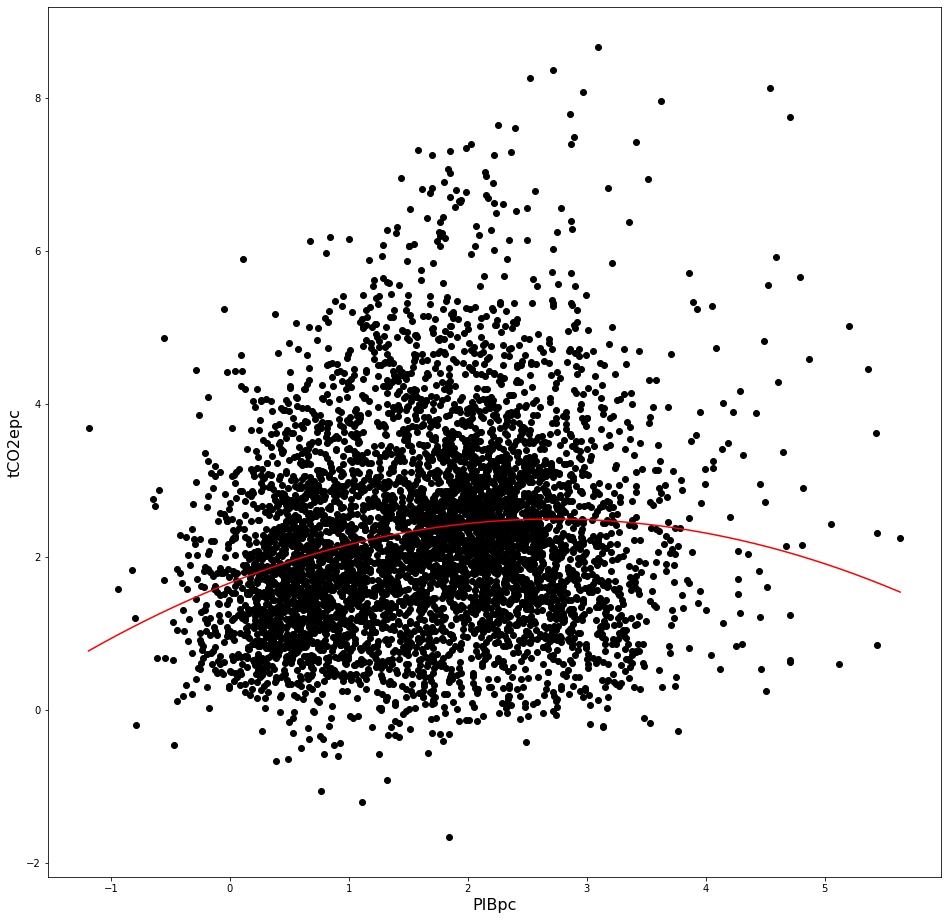

In [90]:
#Plotando um gráfico do modelo Quadrático 
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod0 =  1.6638 + 0.6142*g  -0.1128*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc', fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod0 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [91]:
#Modelo quadratico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix1)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     514.1
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:35:33   Log-Likelihood:                -7237.8
No. Observations:                5550   AIC:                         1.449e+04
Df Residuals:                    5542   BIC:                         1.454e+04
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5210      0.096    -15.815   

14544.550278212802

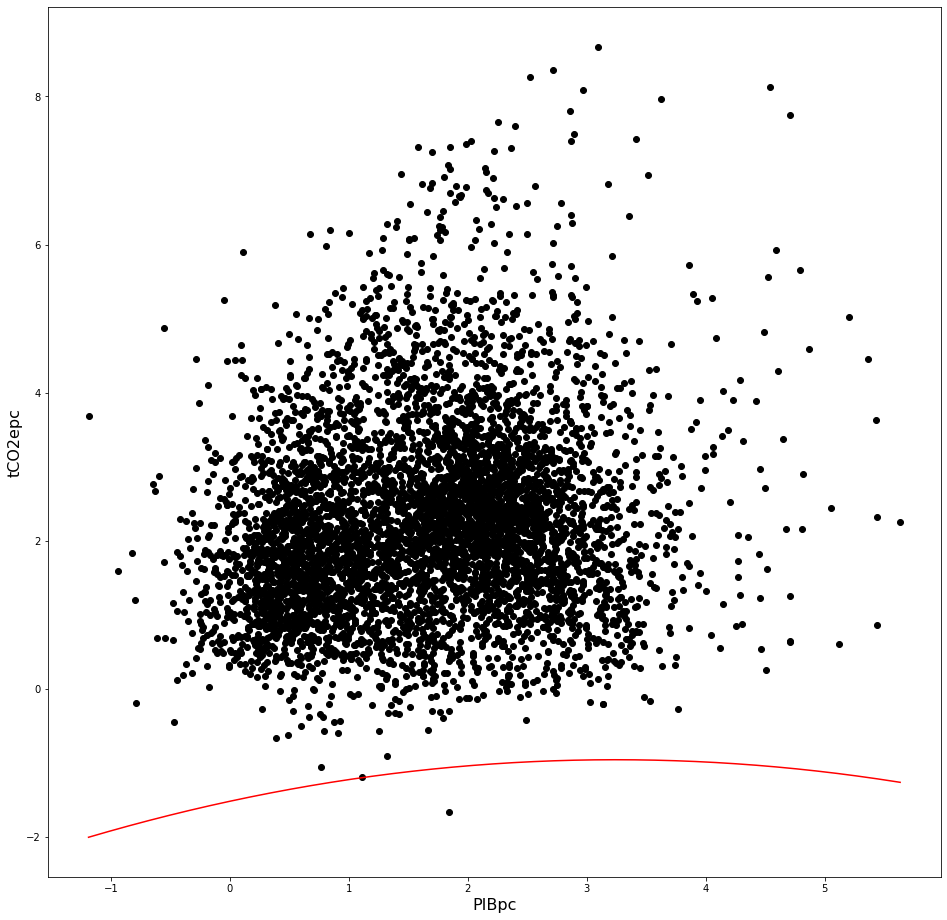

In [92]:
#Plotando um gráfico do modelo Quadrático com impacto regional
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01) #criando um vetor para os valores de X
ymod1 = -1.5210 + 0.3462*g  -0.0534*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod1 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [93]:
# Modelo quadratico com participação do VA dos 3 setores no PIB
modelo = sm.OLS(dados_df[Y],matrix2)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     477.8
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:35:42   Log-Likelihood:                -8102.8
No. Observations:                5550   AIC:                         1.622e+04
Df Residuals:                    5544   BIC:                         1.626e+04
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5780      0.126      4.579      0.0

16257.41316144431

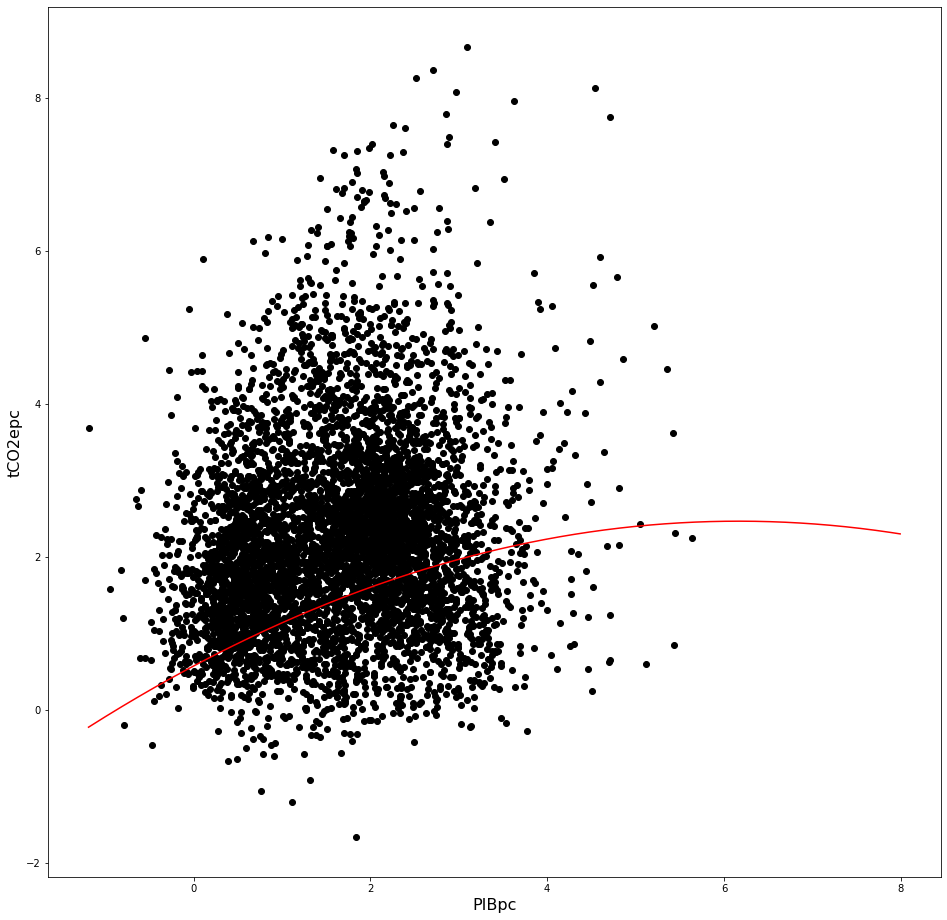

In [94]:
#Plotando um gráfico do Modelo quadratico com participação do VA dos 3 setores no PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), 8, 0.01) #criando um vetor para os valores de X
ymod2 = 0.5780 + 0.6141*g - 0.0498*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc',  fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod2 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [95]:
#Modelo quadratico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix3)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     634.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:36:20   Log-Likelihood:                -6368.7
No. Observations:                5550   AIC:                         1.276e+04
Df Residuals:                    5539   BIC:                         1.283e+04
Df Model:                          10                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3576      0.138     -9.848   

12832.22606103413

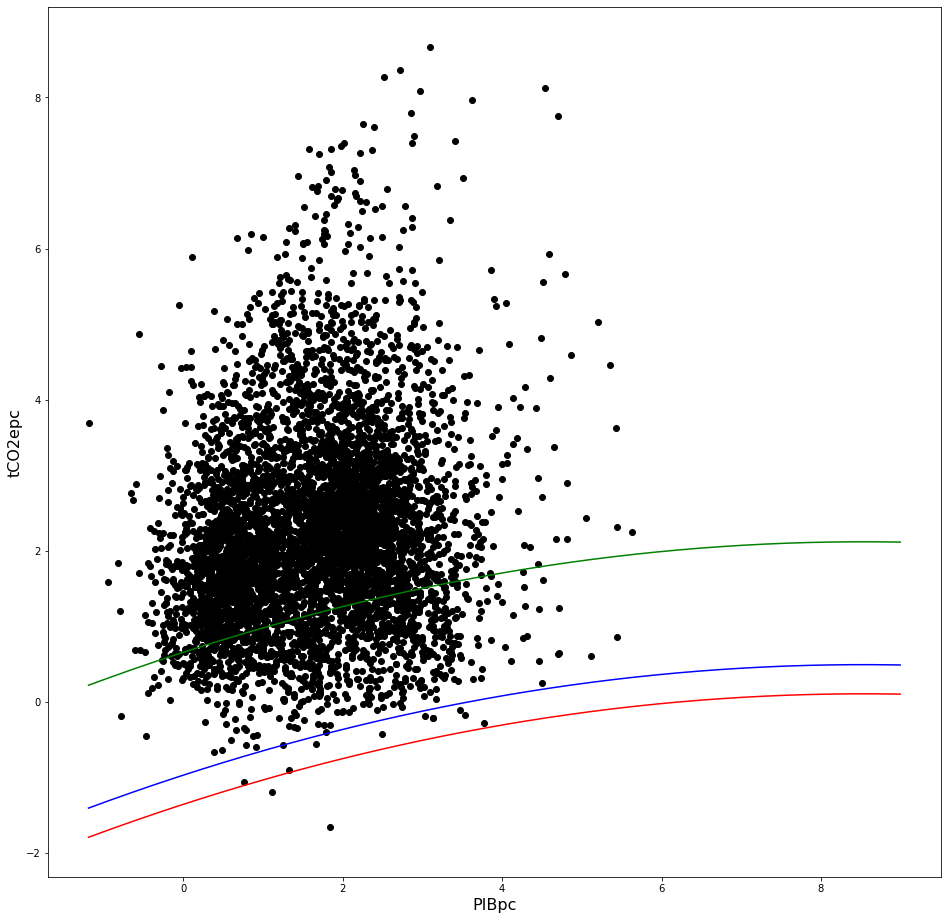

In [97]:
#Plotando um gráfico do modelo Quadrático com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16)) #tamanho da figura
g = np.arange(df.PIBpc.min(), 9, 0.01) #criando um vetor para os valores de X
ymod3 = -1.3576 + 0.3430*g  -0.0201*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado

ys = -0.9714 + 0.3430*g  -0.0201*(g*g) #criando um vetor de Y a partir dos Betas do modelo especificado
ynorte = 0.6551 + 0.3430*g  -0.0201*(g*g)

ax1 = plt.subplot() #criando um subplot que é a variável do gráfico
ax1.set_xlabel('PIBpc', fontsize=16) #Nome no eixo X
ax1.set_ylabel('tCO2epc',  fontsize=16) #Nome no eixo Y
ax1.plot(g,ymod3 , color='red') #plotando o gráfico com as especificações definidas, g(que é o X) e Y1 (que é o Y) e definindo a cor preta
ax1.plot(g,ys , color='blue')
ax1.plot(g,ynorte , color='green')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [98]:
display(dados_df_X)

,const,PIBpc,PIBpc2,PIBpc3,Agro,Ind,Serv,Dist,Sudeste,Norte,Sul,Centro-Oeste
0,1.0,1.606379,2.580452,4.145184,-0.463037,-2.199946,-1.709301,4.634002,0,1,0,0
1,1.0,0.927253,0.859799,0.797251,-0.781520,-2.652809,-0.934907,5.394001,0,1,0,0
2,1.0,1.486735,2.210381,3.286252,-0.800687,-2.490867,-0.970194,5.039027,0,1,0,0
3,1.0,1.604882,2.575646,4.133607,-0.202551,-3.316154,-2.081231,3.104885,0,1,0,0
4,1.0,1.878969,3.530525,6.633748,-0.453141,-1.775765,-2.029045,4.216139,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,1.0,0.835250,0.697643,0.582706,-2.877841,-1.804827,-0.496840,6.091087,0,1,0,0
5546,1.0,2.709590,7.341878,19.893478,-0.327673,-2.597236,-1.737604,4.930532,0,1,0,0
5547,1.0,1.451445,2.106692,3.057746,-0.685300,-2.230006,-1.141253,5.313040,0,1,0,0
5548,1.0,1.678177,2.816278,4.726212,-2.138831,-1.435454,-0.806967,5.925798,0,1,0,0


In [99]:
#definir as matrizes cubicas pela letra B. Cada matriz é um modelo cubico que adiciona ou retira variáveis para analisar
#os diferentes resultados quando feita a regressão
matrix4 = dados_df_X.drop(['Agro','Ind','Serv','Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix5 = dados_df_X.drop(['Agro','Ind','Serv'],axis=1)
matrix6 = dados_df_X.drop(['Dist','Sudeste','Norte','Sul','Centro-Oeste'],axis=1)
matrix7 = dados_df_X


In [101]:
#Modelo cubico apenas os PIBpc
modelo = sm.OLS(dados_df[Y],matrix4)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     77.60
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.60e-49
Time:                        11:38:14   Log-Likelihood:                -9174.2
No. Observations:                5550   AIC:                         1.836e+04
Df Residuals:                    5546   BIC:                         1.838e+04
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5716      0.051     31.093      0.0

18382.950832107832

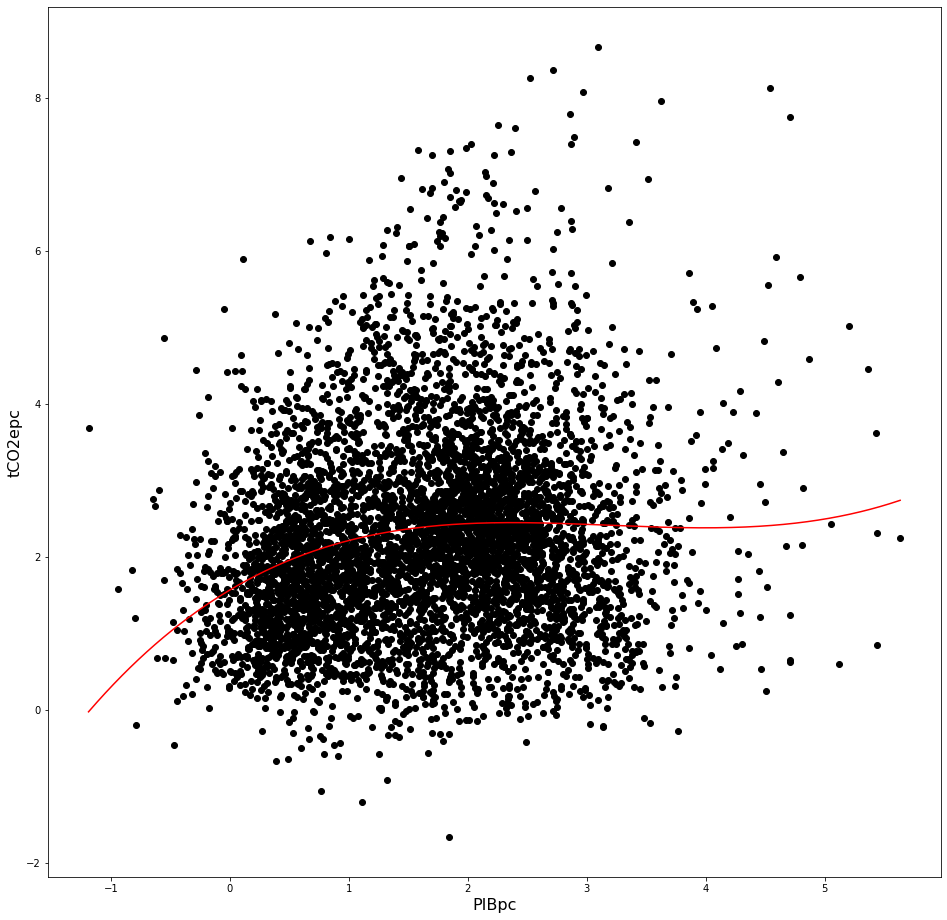

In [102]:
#Gráfico do Modelo cubico
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod4 = 1.5716 + 0.9256*g - 0.3110*(g*g) + 0.0326*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod4 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')


In [104]:
#Modelo cubico com impacto regional
modelo = sm.OLS(dados_df[Y],matrix5)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:39:56   Log-Likelihood:                -7217.3
No. Observations:                5550   AIC:                         1.445e+04
Df Residuals:                    5541   BIC:                         1.451e+04
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6348      0.098    -16.686   

14512.213023721355

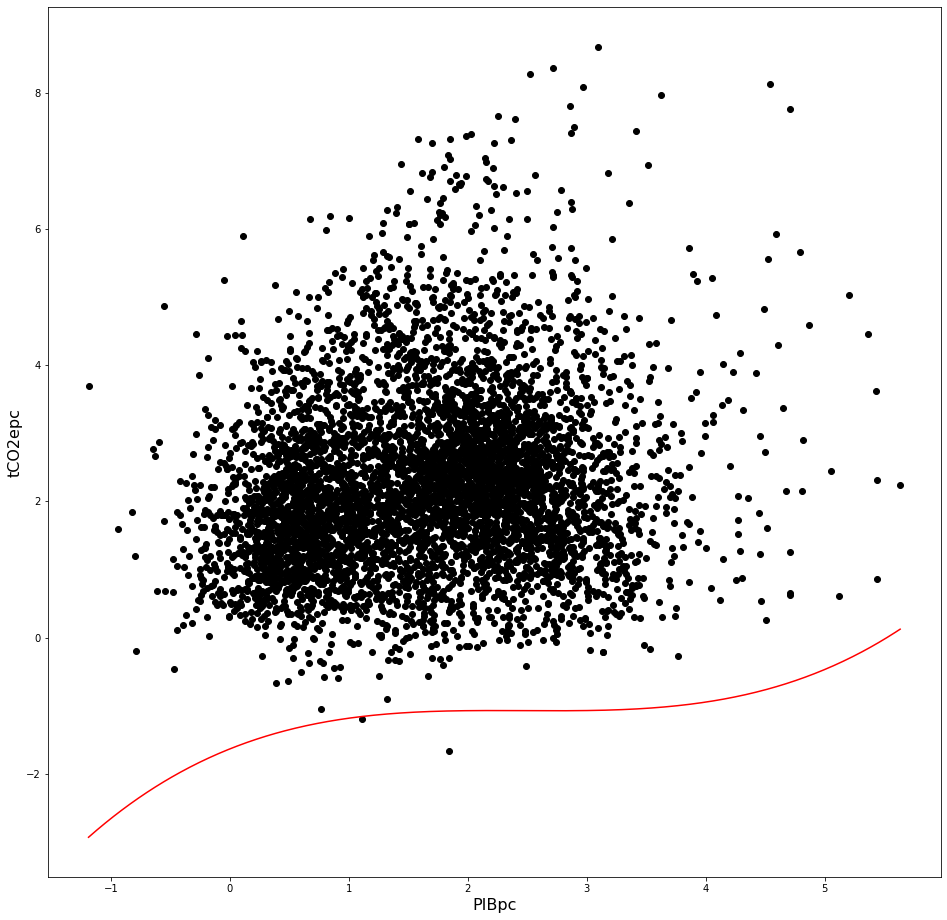

In [105]:
#Gráfico do Modelo cubico com impacto regional
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod5 = -1.6348 + 0.6983*g - 0.2860*(g*g) + 0.0386*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod5 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [107]:
# Modelo cubico com participação do VA dos 3 setores no PIB 
modelo = sm.OLS(dados_df[Y],matrix6)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     409.1
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:41:12   Log-Likelihood:                -8099.4
No. Observations:                5550   AIC:                         1.621e+04
Df Residuals:                    5543   BIC:                         1.626e+04
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5514      0.128      4.298      0.0

16259.085144073872

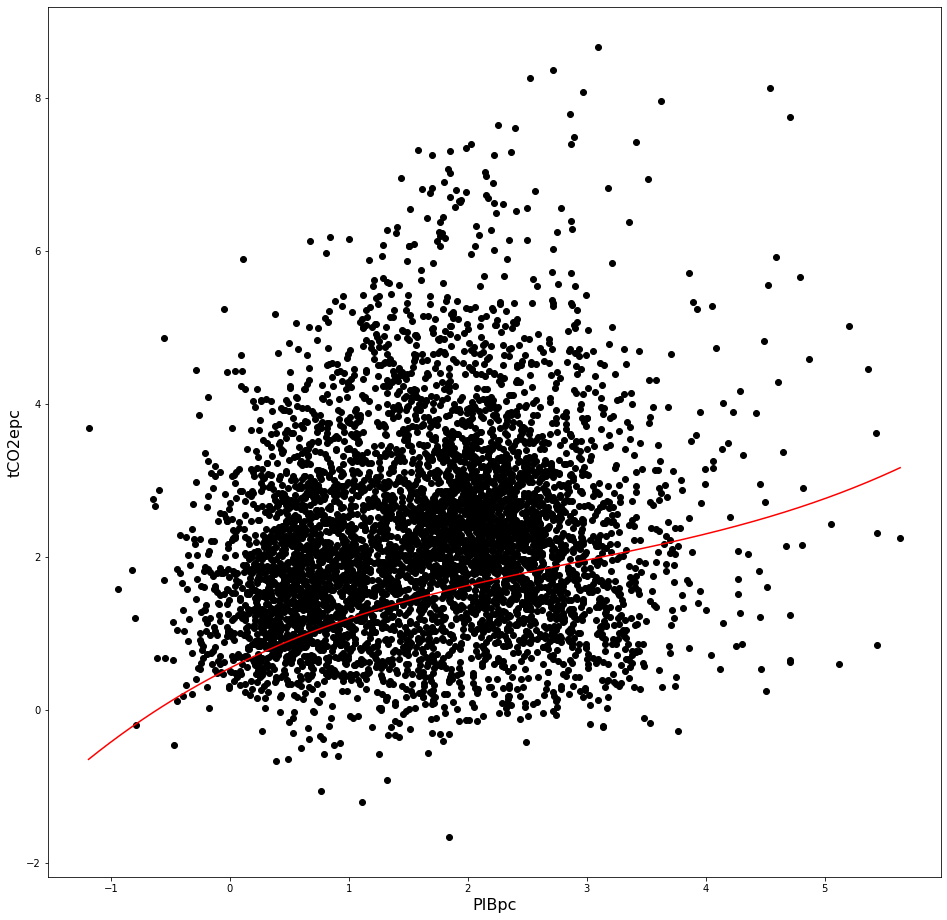

In [108]:
#Gráfico do Modelo cubico com participação do VA dos 3 setores no PIB 
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod6 = 0.5514 + 0.7880*g - 0.1610*(g*g) + 0.0184*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod6 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

In [109]:
# Modelo cubico com impacto regional e VA dos setores do PIB
modelo = sm.OLS(dados_df[Y],matrix7)
res = modelo.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res.summary())
display(res.bic)

                            OLS Regression Results                            
Dep. Variable:                tCO2epc   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     584.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:41:15   Log-Likelihood:                -6362.7
No. Observations:                5550   AIC:                         1.275e+04
Df Residuals:                    5538   BIC:                         1.283e+04
Df Model:                          11                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3911      0.138    -10.051   

12828.842938049547

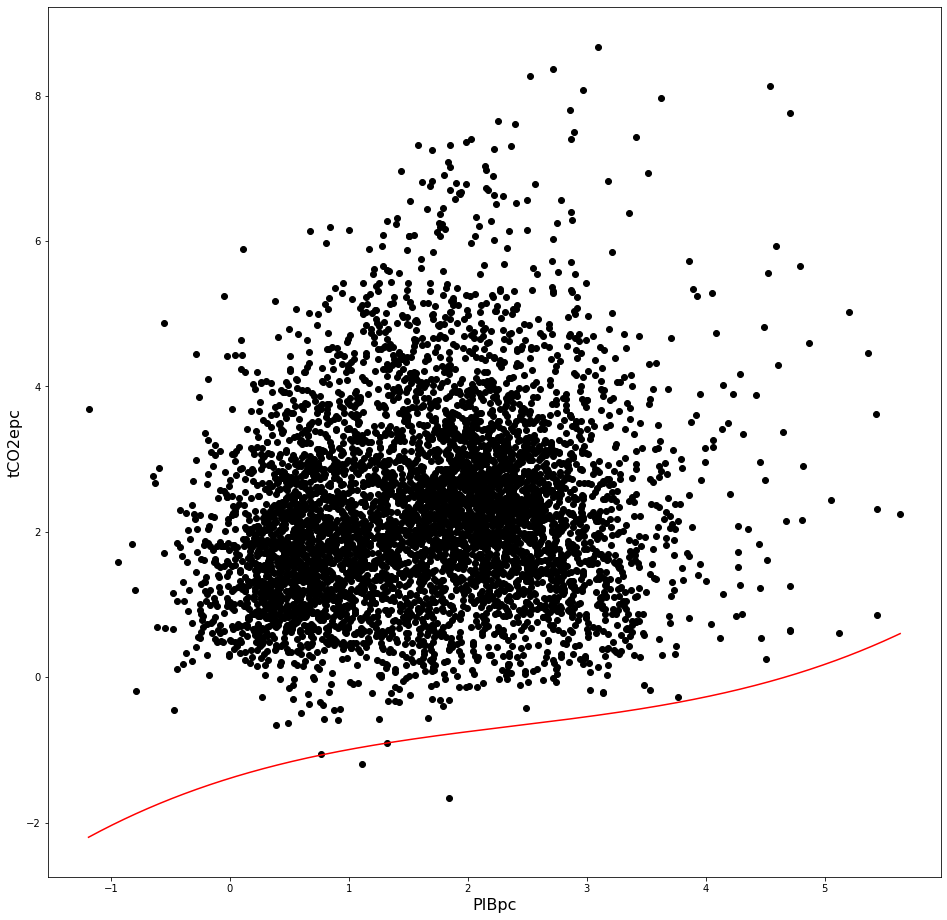

In [68]:
#Gráfico do Modelo cubico com impacto regional e VA dos setores do PIB
plt.figure(figsize = (16,16))
g = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
ymod7 = -1.3911 + 0.5055*g - 0.1284*(g*g) + 0.0180*(g*g*g)

ax1 = plt.subplot()
ax1.set_xlabel('PIBpc', fontsize=16)
ax1.set_ylabel('tCO2epc', fontsize=16)
ax1.plot(g,ymod7 , color='red')
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'black')

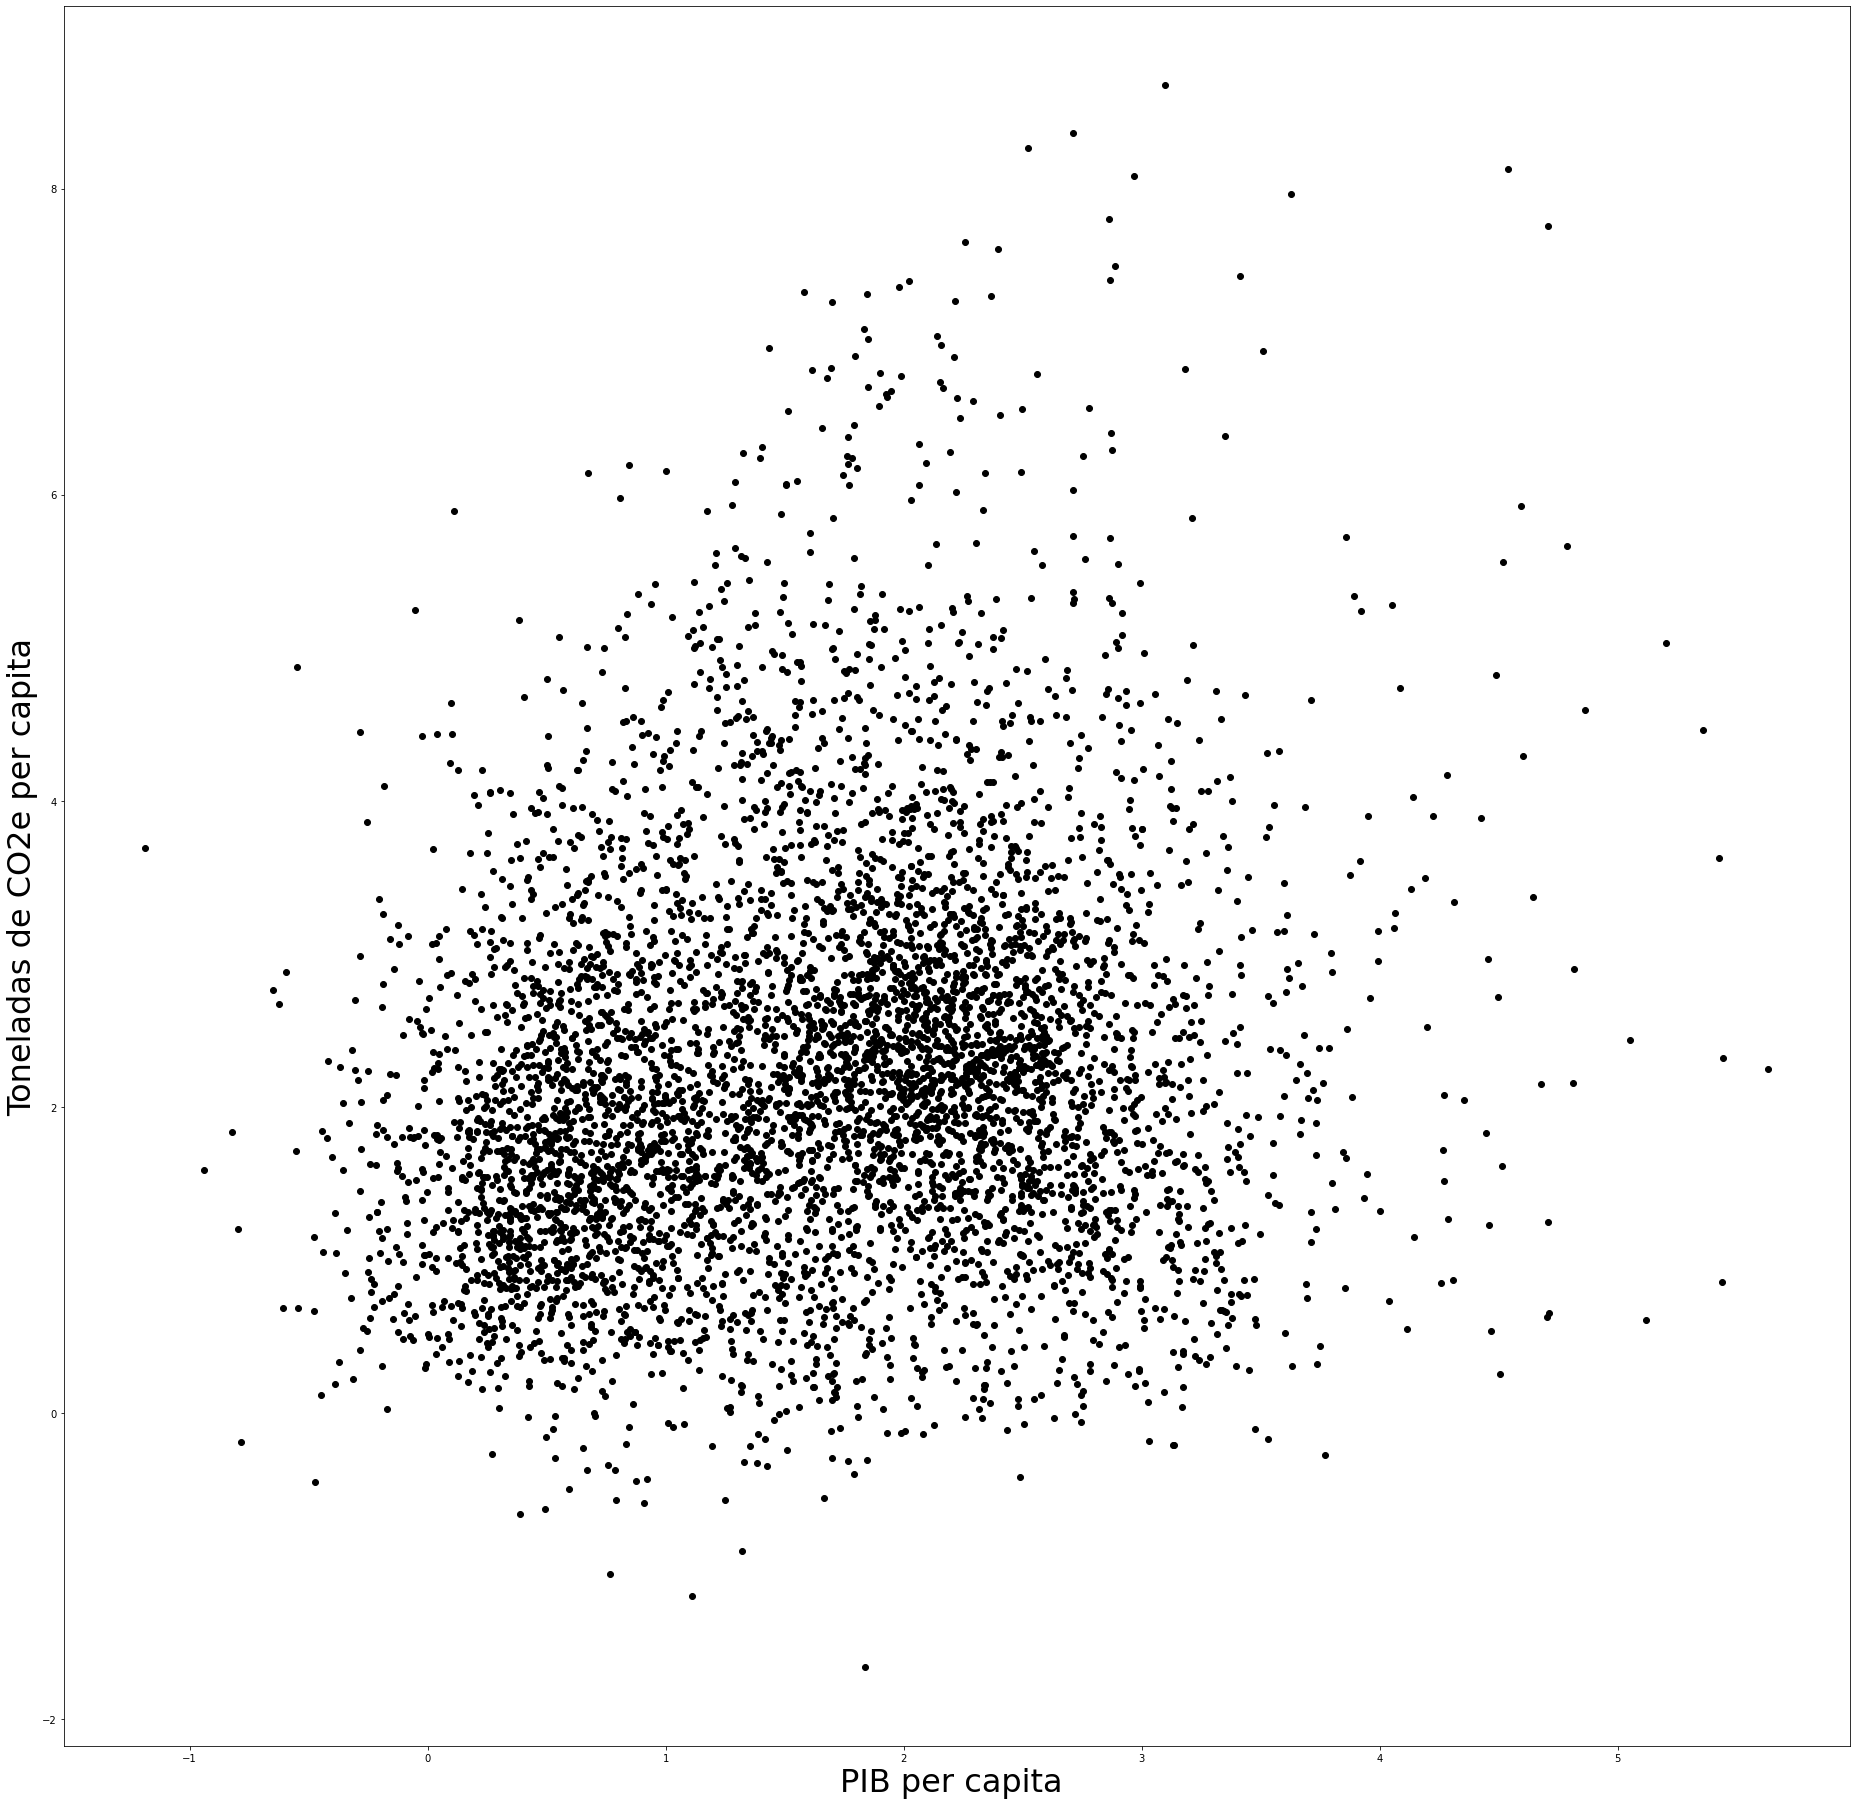

In [69]:
#plotando o gráfico de dispersão das variáveis
plt.figure(figsize = (32,32))
plt.scatter(dados_df['PIBpc'],dados_df['tCO2epc'],c='black')
plt.xlabel("PIB per capita ",fontsize = 32)
plt.ylabel("Toneladas de CO2e per capita", fontsize = 32)
plt.show()

In [70]:
#?sm.OLS
#?sm.QuantReg

modeloq =sm.QuantReg(dados_df[Y],matrix0)
resq = modeloq.fit(q=0.15)

modeloq1 =sm.QuantReg(dados_df[Y],matrix0)
resq1 = modeloq1.fit(q=0.30)

modeloq2 =sm.QuantReg(dados_df[Y],matrix0)
resq2 = modeloq2.fit(q=0.45)

modeloq3 =sm.QuantReg(dados_df[Y],matrix0)
resq3 = modeloq3.fit(q=0.60)

modeloq4 =sm.QuantReg(dados_df[Y],matrix0)
resq4 = modeloq4.fit(q=0.75)

modeloq5 =sm.QuantReg(dados_df[Y],matrix0)
resq5 = modeloq5.fit(q=0.90)

const = [resq.params["const"],resq1.params["const"],resq2.params["const"],resq3.params["const"],resq4.params["const"],resq5.params["const"]]
param1 = [resq.params["PIBpc"],resq1.params["PIBpc"],resq2.params["PIBpc"],resq3.params["PIBpc"],resq4.params["PIBpc"],resq5.params["PIBpc"]]
param2 = [resq.params["PIBpc2"],resq1.params["PIBpc2"],resq2.params["PIBpc2"],resq3.params["PIBpc2"],resq4.params["PIBpc2"],resq5.params["PIBpc2"]]

#print(resq.summary())
#print(resq1.summary())
#print(resq2.summary())
#print(resq3.summary())
#print(resq4.summary())
print(resq5.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:              0.02207
Model:                       QuantReg   Bandwidth:                      0.2464
Method:                 Least Squares   Sparsity:                        10.73
Date:                Tue, 15 Nov 2022   No. Observations:                 5550
Time:                        21:39:16   Df Residuals:                     5547
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0759      0.118     26.148      0.000       2.845       3.307
PIBpc          0.8223      0.156      5.283      0.000       0.517       1.127
PIBpc2        -0.1324      0.045     -2.928      0.003      -0.221      -0.044


Text(0, 0.5, 'tCO2epc')

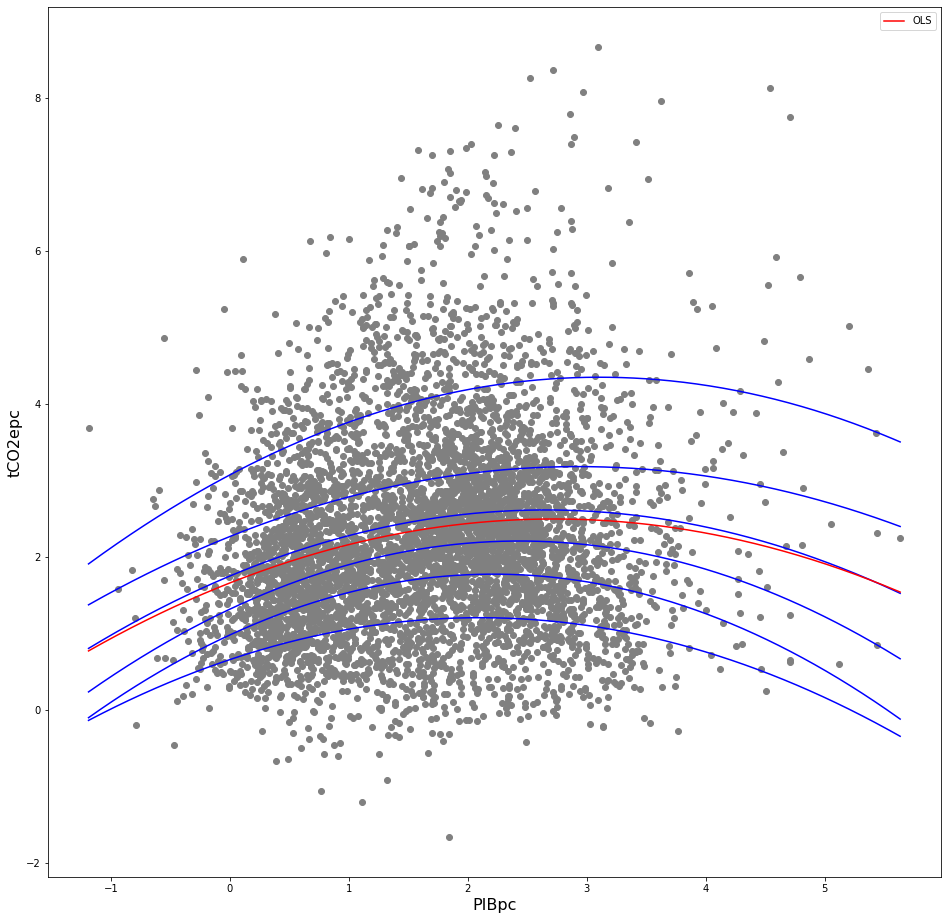

In [71]:
#Regressão Quantilica com o modelo quadrático
x = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y0 = 0.6620 + 0.5217*(x) - 0.1242*(x*x)
y1 = 0.9840 + 0.7179*(x) - 0.1621*(x*x)
y2 = 1.3211 + 0.7321*(x) - 0.1504*(x*x)
y3 = 1.7543 + 0.6510*(x) - 0.1227*(x*x)
y4 = 2.2706 + 0.6249*(x) - 0.1068*(x*x)
y5 = 3.0759 + 0.8223*(x) - 0.1324*(x*x)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x, y0, color="blue")
ax.plot(x, y1, color="blue")
ax.plot(x, y2, color="blue")
ax.plot(x, y3, color="blue")
ax.plot(x, y4, color="blue")
ax.plot(x, y5, color="blue")



ax.plot(x, ymod0, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)

In [72]:
#?sm.OLS
#?sm.QuantReg

modeloq6 =sm.QuantReg(dados_df[Y],matrix7)
resq6 = modeloq6.fit(q=0.15)

modeloq7 =sm.QuantReg(dados_df[Y],matrix7)
resq7 = modeloq7.fit(q=0.30)

modeloq8 =sm.QuantReg(dados_df[Y],matrix7)
resq8 = modeloq8.fit(q=0.45)

modeloq9 =sm.QuantReg(dados_df[Y],matrix7)
resq9 = modeloq9.fit(q=0.60)

modeloq10 =sm.QuantReg(dados_df[Y],matrix7)
resq10 = modeloq10.fit(q=0.75)

modeloq11 =sm.QuantReg(dados_df[Y],matrix7)
resq11 = modeloq11.fit(q=0.90)

const = [resq6.params["const"],resq7.params["const"],resq8.params["const"],resq9.params["const"],resq10.params["const"],resq11.params["const"]]
param1 = [resq6.params["PIBpc"],resq7.params["PIBpc"],resq8.params["PIBpc"],resq9.params["PIBpc"],resq10.params["PIBpc"],resq11.params["PIBpc"]]
param2 = [resq6.params["PIBpc2"],resq7.params["PIBpc2"],resq8.params["PIBpc2"],resq9.params["PIBpc2"],resq10.params["PIBpc2"],resq11.params["PIBpc2"]]
param3 = [resq6.params["PIBpc3"],resq7.params["PIBpc3"],resq8.params["PIBpc3"],resq9.params["PIBpc3"],resq10.params["PIBpc3"],resq11.params["PIBpc3"]]

#print(resq6.summary())
#print(resq7.summary())
#print(resq8.summary())
#print(resq9.summary())
#print(resq10.summary())
print(resq11.summary())

                         QuantReg Regression Results                          
Dep. Variable:                tCO2epc   Pseudo R-squared:               0.4721
Model:                       QuantReg   Bandwidth:                      0.1572
Method:                 Least Squares   Sparsity:                        4.659
Date:                Tue, 15 Nov 2022   No. Observations:                 5550
Time:                        21:39:19   Df Residuals:                     5538
                                        Df Model:                           11
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9077      0.234     -3.873      0.000      -1.367      -0.448
PIBpc            0.5122      0.129      3.962      0.000       0.259       0.766
PIBpc2          -0.2219      0.070     -3.191      0.001      -0.358      -0.086
PIBpc3           0.0417      0.011      3.

Text(0, 0.5, 'tCO2epc')

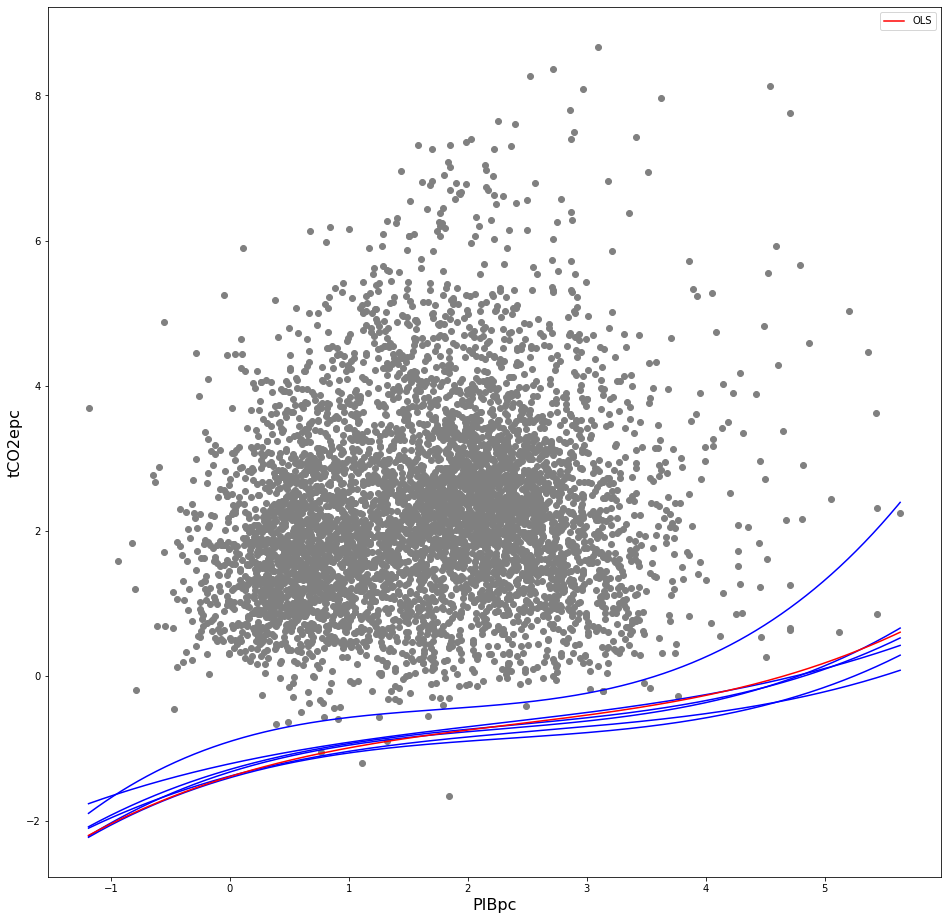

In [110]:
#Regressão Quantilica com o modelo cubico
x1 = np.arange(df.PIBpc.min(), df.PIBpc.max(), 0.01)
   
y6 =  -1.2147 + 0.3598*(x1) -0.0744*(x1*x1) + 0.0110*(x1*x1*x1)
y7 =  -1.3858 + 0.4444*(x1) -0.1168*(x1*x1) + 0.0149*(x1*x1*x1)
y8 =  -1.4075 + 0.4753*(x1) -0.1556*(x1*x1) + 0.0221*(x1*x1*x1)
y9 =  -1.3289 + 0.5122*(x1) -0.1658*(x1*x1) + 0.0244*(x1*x1*x1)
y10 = -1.2928 + 0.4741*(x1) -0.1380*(x1*x1) + 0.0197*(x1*x1*x1)
y11 = -0.9077 + 0.5122*(x1) -0.2219*(x1*x1) + 0.0417*(x1*x1*x1)
    

#display(y2)
fig, ax = plt.subplots(figsize=(16, 16))


ax.plot(x1, y6, color="blue")
ax.plot(x1, y7, color="blue")
ax.plot(x1, y8, color="blue")
ax.plot(x1, y9, color="blue")
ax.plot(x1, y10, color="blue")
ax.plot(x1, y11, color="blue")



ax.plot(x1, ymod7, color="red", label="OLS")
plt.scatter(dados_df['PIBpc'] ,dados_df[Y], c = 'grey')
legend = ax.legend()
ax.set_xlabel("PIBpc", fontsize=16)
ax.set_ylabel("tCO2epc", fontsize=16)